<a href="https://colab.research.google.com/github/Mhoover41/Stroke-Prediction/blob/main/Stroke_Prediction_Project_2_Melissa_Hoover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stroke Prediction**


- **Author:** Melissa Hoover

#**Project Overview**

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Data Source:  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Data Link: [healthcare-dataset-stroke-data.csv](https://github.com/Mhoover41/Stroke-Prediction/files/11501796/healthcare-dataset-stroke-data.csv)

##Data Dictionary

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

#**Load and Inspect Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **Imports**

In [2]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt
#Seaborn
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Classification Metrics

from sklearn.metrics import (ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay,  
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

##### **Loading Data**

In [3]:
#Load the data file
filename= '/content/drive/MyDrive/Project 2/healthcare-dataset-stroke-data.csv'
df= pd.read_csv(filename)

**Inspecting Data**

In [4]:
# Display the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


  How many Rows/Columns:

In [5]:
# Display the number of rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


## **Display Column Names, Count of Non-Null Values, and Data Types**

In [6]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#**Clean Data**

   

Checking the data types:

In [7]:
# Display data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

- The dataset has a combination of categorical (object) and numeric (float and int) data types.
- No mismatched data types were found.

Identifying missing values:

In [8]:
#Display total number of missing values
missing_values= df.isna().sum().sum()
print(f"Total number of missing values is {missing_values}")

Total number of missing values is 201


In [9]:
# Display the count of missing values for each column
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# Display the percentage of missing values for each column
df.isna().sum()/len(df) * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

There are 3.9% missing values in bmi column.  This will be imputed with SimpleImputer in our preprocessing steps. 

Checking for Duplicates:

In [11]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


Drop Unnecessary Columns:

In [12]:
#Drop column
df.drop(columns = ['id'], inplace=True)

In [13]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- I have confirmed the 'id' column is now dropped.

# Statistics Function

In [14]:
# Create a function to display supplemental statistics
def column_statistics(column_name, max_unique_values_to_disply=20):
 # Display the count of missing values for this column
 print(f'Missing Values: {df[column_name].isna().sum()} ({round((df[column_name].isna().sum())/(df.shape[0])*100,1)})%')

 # Determine Outliers - Only if this is a numeric column
 if (df[column_name].dtype == 'int64') | (df[column_name].dtype == 'float64'):
 # Create outlier filters
  q1 = df[column_name].quantile(0.25) # 25th percentile
  q3 = df[column_name].quantile(0.75) # 75th percentile
  iqr = q3 - q1 # Interquartile range
  low_limit = q1 - (1.5 * iqr) # low limit
  high_limit = q3 + (1.5 * iqr) # high limit
 # Create outlier dataframes
 low_df = df[(df[column_name] < low_limit)]
 high_df = df[(df[column_name] > high_limit)]
 # Calculate the outlier counts and percentages
 low_oulier_count = low_df.shape[0]
 low_outlier_percentge = round(((low_oulier_count)/(df.shape[0])*100),1)
 high_oulier_count = high_df.shape[0]
 high_outlier_percentge = round(((high_oulier_count)/(df.shape[0])*100),1)
 # Display the outlier counts.
 print(f'Outliers: {low_oulier_count} ({low_outlier_percentge})% low, {high_oulier_count} ({high_outlier_percentge})% high')
 
 # Display the count of unique values for this column
 print(f'Unique values: {df[column_name].nunique()}')

 # Display the unique values including Nan and their counts for this column,
 # if the number of unique values is below the function parameter
 if df[column_name].nunique() < max_unique_values_to_disply:
  print(df[column_name].value_counts(dropna=False))

 # Return the dataframe with outliers on the high side
 return high_df


##Numerical Columns
- Check for inconsistencies in all columns that are Integer or Float data types
- Check for unusual or impossible values.
- Check for Outliers

In [15]:
#View summary statistics
df.describe(include='number')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- The only unusual values I see are for the age.  An age of .08 doesn't make sense.  Lets investigate further.   

### Age Column

In [16]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

- There are some floats we need to convert to whole numbers. 

In [17]:
df['age'] = df['age'].round(0)

In [18]:
df['age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
10.0     35
4.0      34
7.0      32
6.0      24
0.0      20
Name: age, Length: 83, dtype: int64

I can see we now have 20 ages that are 0, lets round those up to 1. 

In [19]:
df['age'] = df['age'].replace(0, 1)

In [20]:
df['age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
11.0     36
10.0     35
4.0      34
7.0      32
6.0      24
Name: age, Length: 82, dtype: int64

In [21]:
df['age'].describe()

count    5110.000000
mean       43.230528
std        22.605333
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

- We now have a minimum age of 1 and a maximum age of 82

### Hypertension Column

In [22]:
df['hypertension'].unique()

array([0, 1])

### Heart Disease Column

In [23]:
df['heart_disease'].unique()

array([1, 0])

### Average Glucose Level Column

In [24]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

### BMI Column

In [25]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

- There may be some outliers here lets look at a box plot to see where they are later on

### Stroke Column

In [26]:
df['stroke'].unique()

array([1, 0])

## Categorical Columns
- Check for inconsistencies in all columns that are object data types


In [27]:
#View Summary Statistics for Object data types
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [28]:
from scipy.sparse import data
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [29]:
## Display the index of object datatypes
object_data_types.index

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [30]:
## Loop through the object datatype columns
for column in object_data_types.index:
    ## Print the column name
    print(column)
    ## Print the unique values from the column
    print(df[column].unique())
    ## Print a blank row
    print('\n')

gender
['Male' 'Female' 'Other']


ever_married
['Yes' 'No']


work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Residence_type
['Urban' 'Rural']


smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




- No inconsistencies noted

# **Exploratory Data Analysis**

### Functions

#### Function to Display Histogram and Boxplot

In [31]:
# Create a function to create a Histogram and Boxplot in the same figure
def hist_box_plot(column_name, bin_count):
    fig, (ax1,ax2) = plt.subplots(nrows =2, sharex=True, figsize=(8, 6), 
                                  facecolor='w', 
                                  gridspec_kw={'height_ratios':[0.75, 0.25]})
    plt.suptitle(f'{column_name}', y=1.02, va='center', 
                 fontsize = 22, weight='bold')
    sns.histplot(data=df, x=column_name, color='#069AF3', linewidth=2, 
                 ax=ax1, bins=bin_count);
    plt.xlabel(column_name, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    ax1.set_ylabel('Instances',fontweight='bold',fontsize=18)
    ax1.set_facecolor('lightblue')
    ax1.tick_params(labelcolor='k', labelsize=10)
    ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    #ax1.set_yticklabels(ax1.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(3)
    sns.boxplot(data=df, x=column_name, width=.5, color='#069AF3', ax=ax2,
                medianprops={'color':'k', 'linewidth':2},
                whiskerprops={'color':'k', 'linewidth':2},
                boxprops={'facecolor':'#069AF3', 
                          'edgecolor':'k', 'linewidth':2},
                capprops={'color':'k', 'linewidth':3}); 
    ax2.tick_params(labelcolor='k', labelsize=10)
    ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    #ax2.set_xticklabels(ax2.get_xticks(), fontweight='bold')
    ax2.spines['bottom'].set_linewidth(2)
    ax2.spines['top'].set_color(None)
    ax2.spines['left'].set_color(None)
    ax2.spines['right'].set_color(None)
    plt.tight_layout();
    plt.show;

#### Function to Display Countplot

In [32]:
# Create a function to create a Count Plot
def count_plot(column_name, label_order):
    fig, ax = plt.subplots(nrows=1, figsize=(8,4), facecolor='w')
    plt.title(column_name, fontsize = 22, weight='bold')
    sns.countplot(data=df, x=column_name, lw=3, ec='k', 
                  color='#069AF3', order=label_order)
    plt.xlabel('')
    plt.xticks(weight='bold')
    ax.set_ylabel('Instances', fontweight='bold', fontsize=18)
    ax.set_facecolor('lightblue')
    ax.tick_params(labelcolor='k', labelsize=12)
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    #ax.set_yticklabels(ax.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    plt.tight_layout()
    plt.show;

####Function to Display Scatter Plot

In [33]:
# Create a function to create a Count Plot
# Sex and Age correlation to Stroke
def scatter_plot(x,y):
    palette_dict = {No: 'indigo' , Yes: 'magenta'}
    fig, ax = plt.subplots(figsize=(8,4), facecolor='w')
    sns.scatterplot(x=x, y=y, hue="stroke", 
                    palette=palette_dict, data=df);
    plt.title(f'{x} and {y} \ncorrelation to Stroke', fontsize = 18, weight='bold')
    plt.xlabel(f'{x}', fontsize = 14, weight='bold')
    plt.ylabel(f'{y}', fontsize = 14, weight='bold');
    plt.xticks(fontsize = 10, weight='bold')
    plt.yticks(fontsize = 10, weight='bold');
    ax.set_facecolor('lightblue')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    plt.legend(bbox_to_anchor=(1.23, 1))
    plt.tight_layout()
    plt.show;

##Numerical Columns



- For each numeric column, we will visualize the distribution with a histogram and a boxplot.

### Summary Statistics

In [34]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.230528,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.605333,0.296607,0.226063,45.283560,7.854067,0.215320
min,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Age Column

In [35]:
#Display the descriptive statistics for the column
df['age'].describe()

count    5110.000000
mean       43.230528
std        22.605333
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [36]:
# Display supplemental column statistics
column_statistics('age')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 82


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


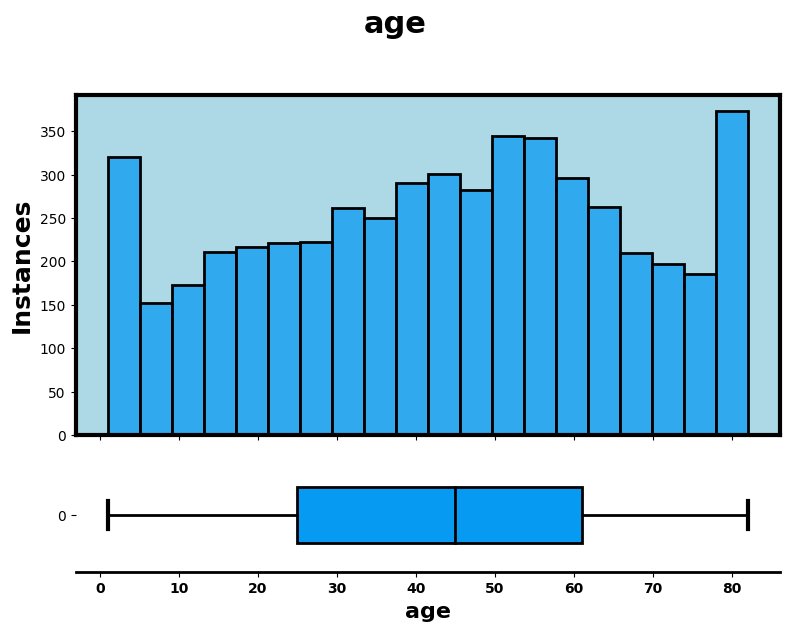

In [37]:
# Utilize function to display histogram and boxplot
hist_box_plot('age',20)

- There are no outliers and the median Age is 45.

### Average Glucose Level

In [38]:
#Display the descriptive statistics for the column
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [39]:
# Display supplemental column statistics
column_statistics('avg_glucose_level')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 627 (12.3)% high
Unique values: 3979


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


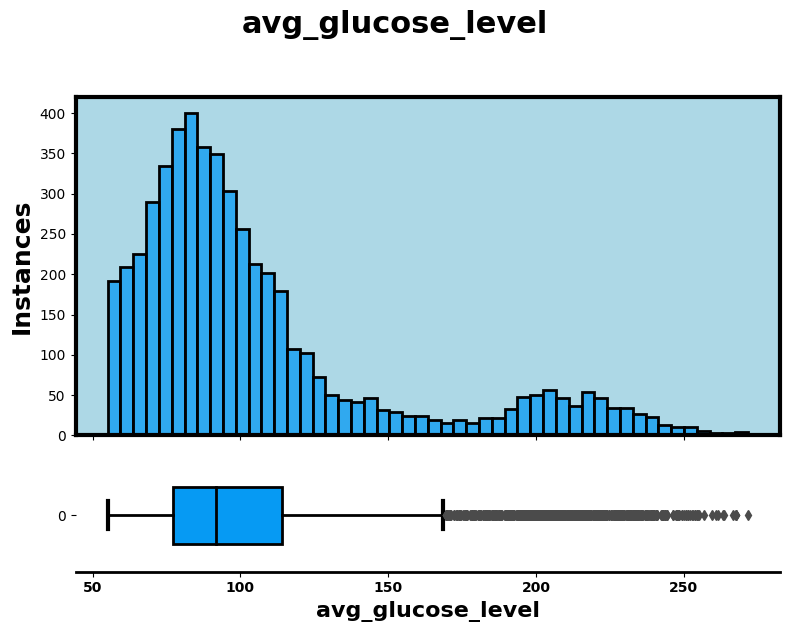

In [40]:
# Use Function to display Histogram and Boxplot
hist_box_plot('avg_glucose_level', 50);

- This is right skewed.  The maximum average glucose level is 271.  The mean is 106 and median is 92.  There is 12.3% outliers on the high side.  Since this is a signtificant amount I don't want to lose that much data so I will leave the outliers in place. 

### BMI Column

In [41]:
#Displaty Summary Statistics for the column
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [42]:
# Display supplemental column statistics
column_statistics('bmi')

Missing Values: 201 (3.9)%
Outliers: 0 (0.0)% low, 110 (2.2)% high
Unique values: 418


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
4858,Female,43.0,0,0,Yes,Private,Urban,100.88,47.6,smokes,0
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0


- I have decided to remove these high outliers as a BMI of over 45 is extremely unlikely.

In [43]:
def remove_high_outliers(column_name):
    # Determine outliers - Only if this is a numeric column
    if (df[column_name].dtype == 'int64') or (df[column_name].dtype == 'float64'):
        # Create outlier filters
        q1 = df[column_name].quantile(0.25)  # 25th percentile
        q3 = df[column_name].quantile(0.75)  # 75th percentile
        iqr = q3 - q1  # Interquartile range
        low_limit = q1 - (1.5 * iqr)  # Low limit
        high_limit = q3 + (1.5 * iqr)  # High limit

        # Create outlier dataframes
        low_df = df[(df[column_name] < low_limit)]
        high_df = df[(df[column_name] > high_limit)]

        # Drop the high outliers
        df.drop(high_df.index, inplace=True)

        # Display the count of removed outliers
        outlier_count = high_df.shape[0]
        outlier_percentage = round((outlier_count / df.shape[0]) * 100, 1)
        print(f'Dropped {outlier_count} ({outlier_percentage}%) high outliers')

# Call the function to remove high outliers for a specific column
column_name = 'bmi'  # Replace with the actual name of the column
remove_high_outliers(column_name)


Dropped 110 (2.2%) high outliers


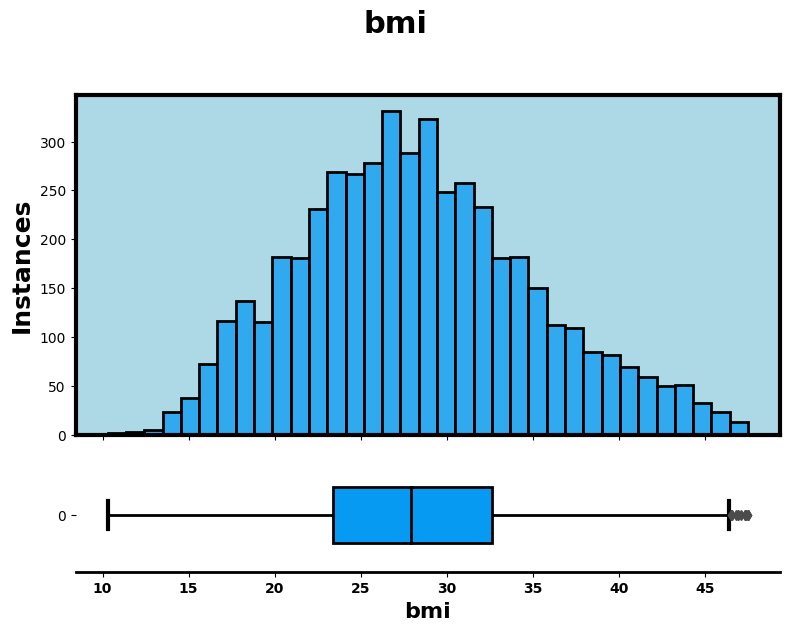

In [44]:
# Use Function to display Histogram and Boxplot
hist_box_plot('bmi','auto');

In [45]:
df['bmi'].describe()

count    4799.000000
mean       28.313586
std         6.841250
min        10.300000
25%        23.400000
50%        27.900000
75%        32.600000
max        47.500000
Name: bmi, dtype: float64

- The mean is now 28 and the median is 27 which represents a normal distribution.

##Categorical Columns

- For each categorical column we will display the value counts, descriptive statistics, and a count plot to visualize the data.

### Summary Statistics

In [46]:
df.describe(exclude=('number'))

,gender,ever_married,work_type,Residence_type,smoking_status
count,5000,5000,5000,5000,5000
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2909,3268,2848,2547,1844


###Hypertension Column

In [47]:
# Replace names so it's easier to understand and understand graphs
df['hypertension'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [48]:
#Display the value counts for the column
df['hypertension'].value_counts()

No     4523
Yes     477
Name: hypertension, dtype: int64

In [49]:
#Display the normalized value counts for the column
df['hypertension'].value_counts(normalize = True)

No     0.9046
Yes    0.0954
Name: hypertension, dtype: float64

In [50]:
#Display the normalized value counts for the column
df['hypertension'].describe()

count     5000
unique       2
top         No
freq      4523
Name: hypertension, dtype: object

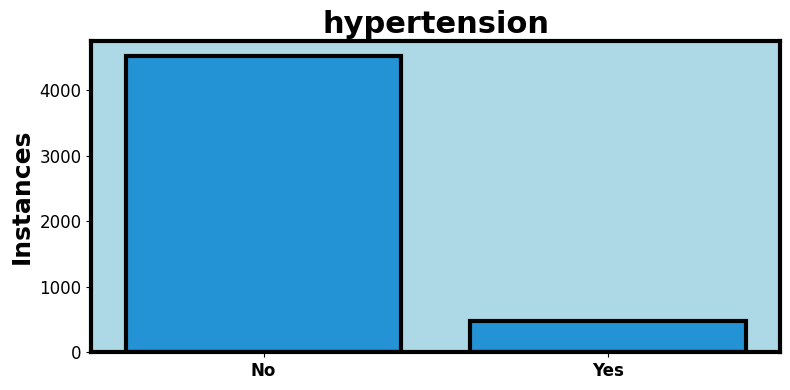

In [51]:
# Utilize function to display count plot
count_plot('hypertension', ['No', 'Yes'])

 - The majority do not have hypertension. 

### Heart Disease Column

In [52]:
# Replace names so it's easier to understand and understand graphs
df['heart_disease'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [53]:
#Display the value counts for the column
df['heart_disease'].value_counts()

No     4725
Yes     275
Name: heart_disease, dtype: int64

In [54]:
#Display the normalized value counts for the column
df['heart_disease'].value_counts(normalize = True)

No     0.945
Yes    0.055
Name: heart_disease, dtype: float64

 - With this being only 5%, I would remove the Yes and then it would be a single column of No values.  This column would not be a good indicator of stroke with all values being No.  I will remove the column. 

In [55]:
#Drop column
df.drop(columns = ['heart_disease'], inplace=True)

In [56]:
df.columns

Index(['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

- Confirmed Heart Disease column is now dropped. 

###Gender Column

In [57]:
#Display the value counts for the column
df['gender'].value_counts()

Female    2909
Male      2090
Other        1
Name: gender, dtype: int64

In [58]:
#Display the normalized value counts for the column
df['gender'].value_counts(normalize = True)

Female    0.5818
Male      0.4180
Other     0.0002
Name: gender, dtype: float64

In [59]:
#Display the descriptive statistics for the column
df['gender'].describe()

count       5000
unique         3
top       Female
freq        2909
Name: gender, dtype: object

- With "Other" being only 1 value, I will remove that row.

In [60]:
#Removing all rows with Never_worked
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

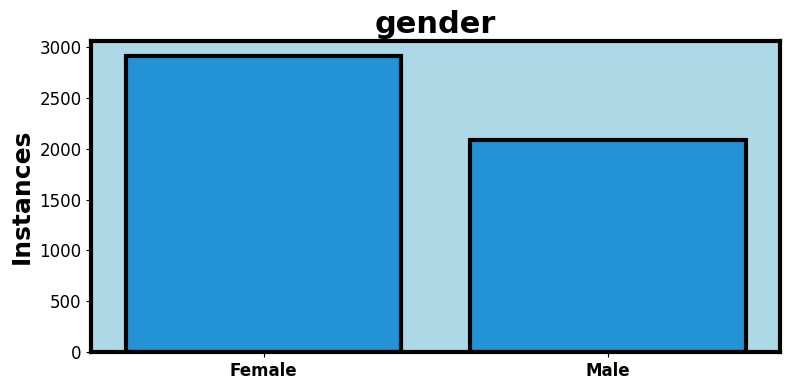

In [61]:
# Utilize function to display count plot
count_plot('gender', ['Female', 'Male'])

- The distribution is 63% female and 37% male.

### Ever Married Column

In [62]:
#Display the value counts for the column
df['ever_married'].value_counts()

Yes    3268
No     1731
Name: ever_married, dtype: int64

In [63]:
#Display the normalized value counts for the column
df['ever_married'].value_counts(normalize = True)

Yes    0.653731
No     0.346269
Name: ever_married, dtype: float64

In [64]:
#Display the descriptive statistics for the column
df['ever_married'].describe()

count     4999
unique       2
top        Yes
freq      3268
Name: ever_married, dtype: object

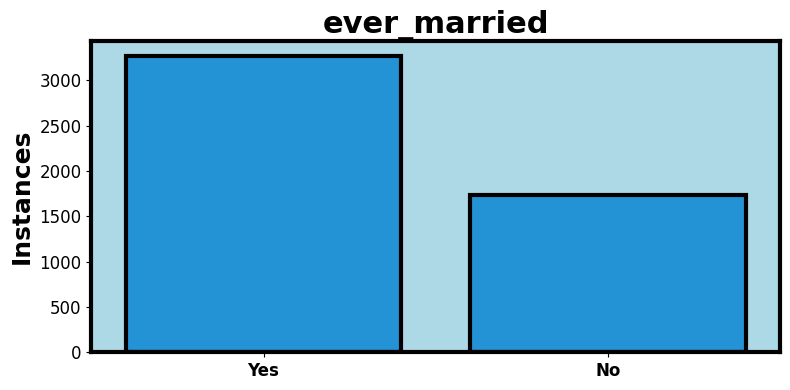

In [65]:
# Utilize function to display count plot
count_plot('ever_married', ['Yes', 'No'])

### Work Type Column

In [66]:
#Display the value counts for the column
df['work_type'].value_counts()

Private          2847
Self-employed     803
children          687
Govt_job          640
Never_worked       22
Name: work_type, dtype: int64

In [67]:
#Display the normalized value counts for the column
df['work_type'].value_counts(normalize = True)

Private          0.569514
Self-employed    0.160632
children         0.137427
Govt_job         0.128026
Never_worked     0.004401
Name: work_type, dtype: float64

- With Never Worked being under 1%, we will remove that type as it will not be useful in our modeling.

In [68]:
#Removing all rows with Never_worked
df.drop(df[df['work_type'] == 'Never_worked'].index, inplace=True)

In [69]:
#Display the normalized value counts for the column
df['work_type'].value_counts(normalize = True)

Private          0.572031
Self-employed    0.161342
children         0.138035
Govt_job         0.128592
Name: work_type, dtype: float64

- Confirmed Never worked is now removed.

In [70]:
#Display the descriptive statistics for the column
df['work_type'].describe()

count        4977
unique          4
top       Private
freq         2847
Name: work_type, dtype: object

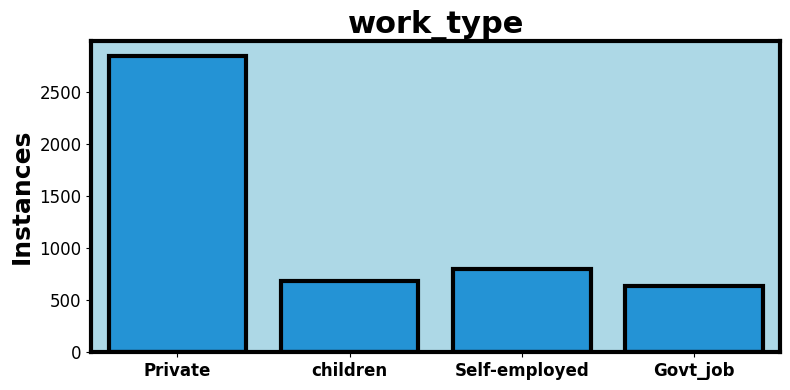

In [71]:
# Utilize function to display count plot
count_plot('work_type', ['Private', 'children', 'Self-employed', 'Govt_job'])

 - The majority of people have a Private work type followed by self-employed.

### Residence Type Column

In [72]:
#Display the value counts for the column
df['Residence_type'].value_counts()

Urban    2532
Rural    2445
Name: Residence_type, dtype: int64

In [73]:
#Display the normalized value counts for the column
df['Residence_type'].value_counts(normalize = True)

Urban    0.50874
Rural    0.49126
Name: Residence_type, dtype: float64

In [74]:
#Display the descriptive statistics for the column
df['Residence_type'].describe()

count      4977
unique        2
top       Urban
freq       2532
Name: Residence_type, dtype: object

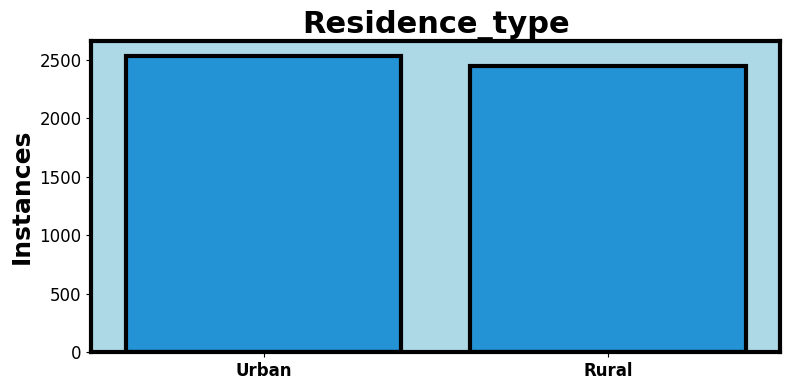

In [75]:
# Utilize function to display count plot
count_plot('Residence_type', ['Urban', 'Rural'])

- These are distributed fairly evenly with Urban being slightly higher.

### Smoking Status Column

In [76]:
#Display the value counts for the column
df['smoking_status'].value_counts()

never smoked       1830
Unknown            1512
formerly smoked     862
smokes              773
Name: smoking_status, dtype: int64

In [77]:
#Display the normalized value counts for the column
df['smoking_status'].value_counts(normalize = True)

never smoked       0.367691
Unknown            0.303797
formerly smoked    0.173197
smokes             0.155314
Name: smoking_status, dtype: float64

In [78]:
#Display the descriptive statistics for the column
df['smoking_status'].describe()

count             4977
unique               4
top       never smoked
freq              1830
Name: smoking_status, dtype: object

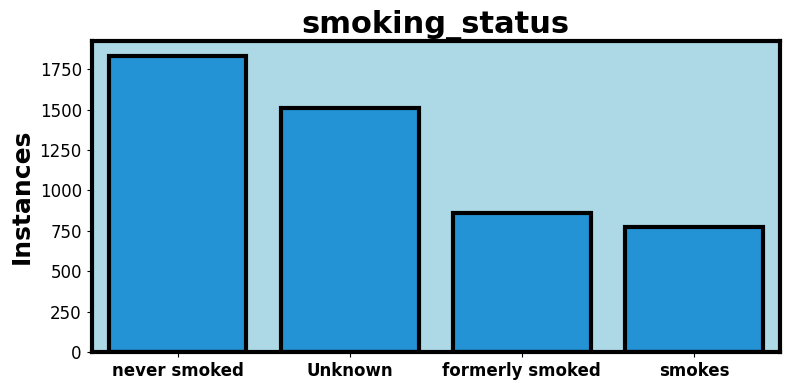

In [79]:
# Utilize f'unction to display count plot
count_plot('smoking_status', ['never smoked', 'Unknown', 'formerly smoked','smokes'])

- Never smoked and unknown are about the same followed by formerly smoked. 

### Stroke Column

In [80]:
# Replace names so it's easier to understand and understand graphs
df['stroke'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [81]:
#Display the value counts for the column
df['stroke'].value_counts()

No     4730
Yes     247
Name: stroke, dtype: int64

In [82]:
#Display the normalized value counts for the column
df['stroke'].value_counts(normalize = True)

No     0.950372
Yes    0.049628
Name: stroke, dtype: float64

In [83]:
#Display the descriptive statistics for the column
df['stroke'].describe()

count     4977
unique       2
top         No
freq      4730
Name: stroke, dtype: object

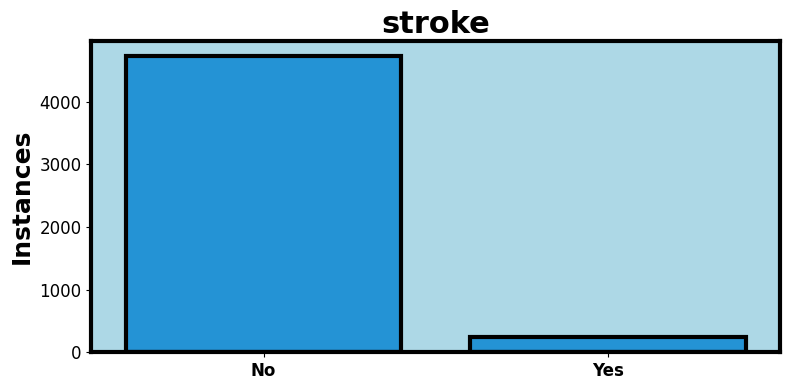

In [84]:
# Utilize function to display count plot
count_plot('stroke', ['No', 'Yes'])

- We can see this is a very unbalanced dataset with less than 1% having a stroke. 

# Explanatory Data Analysis

## Correlation Heatmap 

In [85]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {"No": 0, "Yes": 1}
df.replace({'stroke': dict}, inplace=True)
df.replace({'hypertension': dict}, inplace=True)
df.replace({'ever_married': dict}, inplace=True)

In [86]:
df.dtypes

gender                object
age                  float64
hypertension           int64
ever_married           int64
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<ipython-input-87-c915e2bb1d48>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


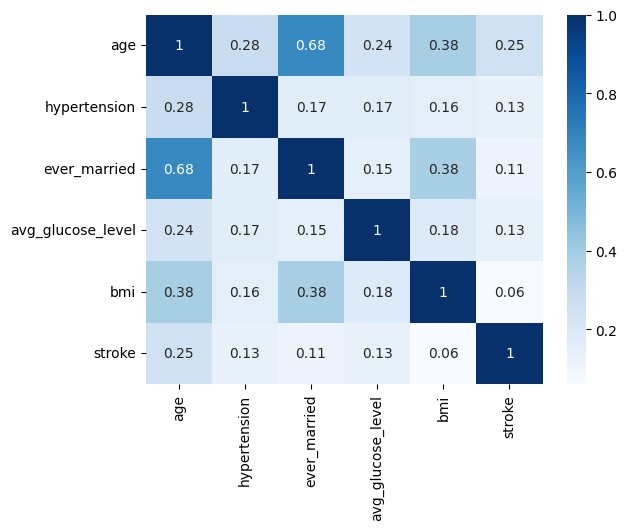

In [87]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True) ;

- Age has the highest correlation to Stroke.

## Bar Plots for Numerical Columns

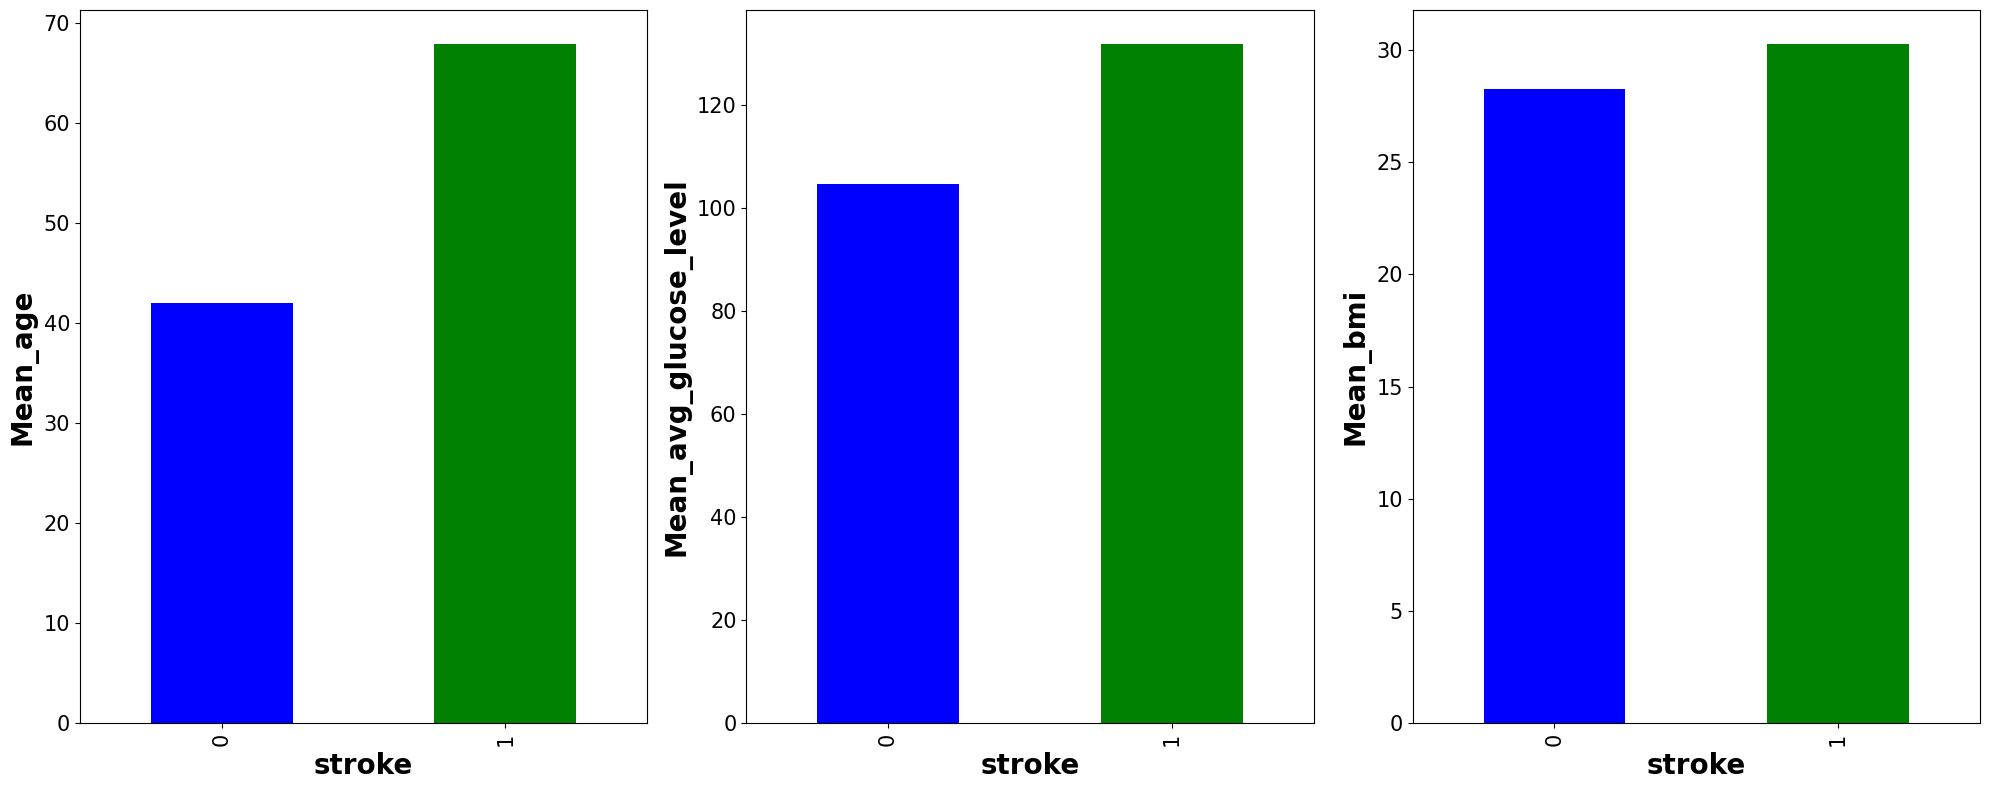

In [88]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 8))
for i, c in enumerate(['age', 'avg_glucose_level', 'bmi']):
    df.groupby('stroke')[c].mean().plot(kind='bar', ax=axes[i], color=('blue', 'green'))
    axes[i].set_ylabel(f'Mean_{c}', fontsize=20, fontweight='bold')
    axes[i].set_xlabel('stroke', fontsize=20, fontweight='bold')
    axes[i].tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

- Higher age does correlate with having a stroke.  It does not appear that Average Gluclose Level or BMI are correlated with stroke. 

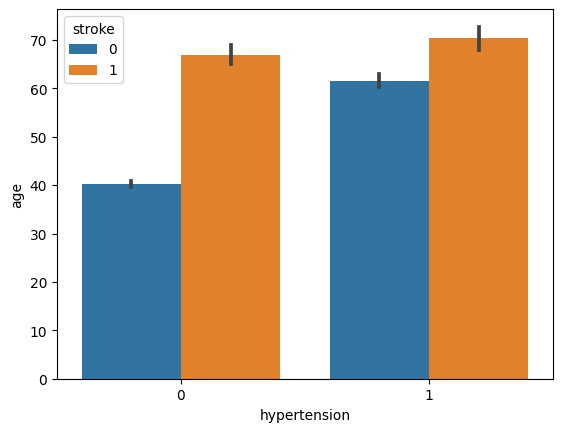

In [89]:
sns.barplot(x='hypertension', y='age', hue='stroke', data=df)
plt.show()

- Stroke is more likely with a higher age and hypertension.

##Lineplot Age versus BMI

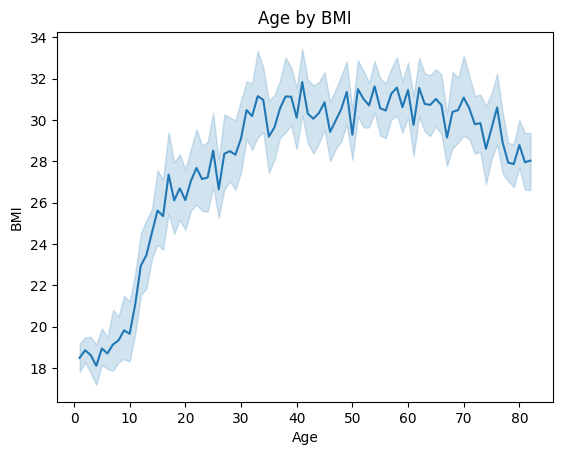

In [90]:
ax = sns.lineplot(data=df, x='age', y='bmi')
ax.set_title('Age by BMI')
ax.set_xlabel('Age')
ax.set_ylabel('BMI');

## Histogram

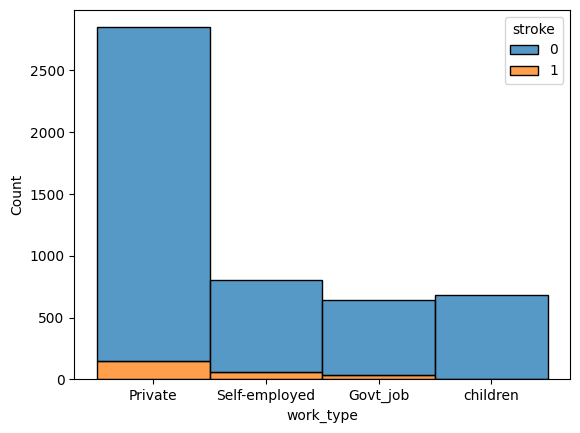

In [91]:
sns.histplot(data=df, x="work_type", hue="stroke", multiple="stack")
plt.show()

- The individuals who have Private work type have the most incidence of stroke.

# Check Class Balance

In [92]:
df['stroke'].value_counts(normalize=False)

0    4730
1     247
Name: stroke, dtype: int64

In [93]:
df['stroke'].value_counts(normalize=True)

0    0.950372
1    0.049628
Name: stroke, dtype: float64

- The target 'stroke', is not balanced, so 'stratify=y' will be used with the Train Test split.

#Model Validation Data Split

In [94]:
#Defining my Target variable which is y and the remaining features X
X = df.drop(columns = ['stroke'].copy())
y = df['stroke'].copy()

labels=['No Stroke', 'Stroke']

In [95]:
## Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Preprocessing for Machine Learning

Identify each feature as ordinal, numerical, or nominal

- Ordinal: None
- Numerical: Age, Hypertension, Ever Married, Average Glucose Level, BMI
- Nominal: Gender, Work Type, Residence Type, Smoking Status


In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3732 entries, 1165 to 1158
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3732 non-null   object 
 1   age                3732 non-null   float64
 2   hypertension       3732 non-null   int64  
 3   ever_married       3732 non-null   int64  
 4   work_type          3732 non-null   object 
 5   Residence_type     3732 non-null   object 
 6   avg_glucose_level  3732 non-null   float64
 7   bmi                3588 non-null   float64
 8   smoking_status     3732 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 291.6+ KB


## Numeric Transformation

In [97]:
# We will use a mean imputer to impute missing values for the numeric columns
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

In [98]:
#Display the numerical columns
num_selector(X_train)

['age', 'hypertension', 'ever_married', 'avg_glucose_level', 'bmi']

## Nominal Transformation

In [99]:
## using constant for demonstration purpose, You can use strategy = 'most_frequest'

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
# Pipeline
nom_pipeline = make_pipeline(ohe)

nominal_cols =make_column_selector(dtype_include='object') 

# Tuple
nominal_tuple = (nom_pipeline, nominal_cols)

In [100]:
#Display the nominal columns
nominal_cols(X_train)

['gender', 'work_type', 'Residence_type', 'smoking_status']

## Ordinal Transformation

In [101]:
# Ordered Category Lists

#age_group = ['young_age', 'middle_age', 'old_age']
#bmi_category = ['underweight', 'normal', 'overweight', 'obese']

# Transformers

#ord = OrdinalEncoder(categories=[age_group, bmi_category],handle_unknown='use_encoded_value',unknown_value = -1)

# We will use a most frequent imputer to impute missing values for the ordinal columns
#freq_imputer = SimpleImputer(strategy='most_frequent')

# We have more than 2 ordinal values for each column so using scaler
#scaler2 = StandardScaler()


# Pipeline
#ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)
# Selector
#ordinal_cols = make_column_selector(dtype_include= 'object')
#ordinal_cols = ['age_group','bmi_category']
# Tuple
#ordinal_tuple = (ord_pipeline, ordinal_cols)

##Instantiate ColumnTransformer

In [103]:
# Create the ColumnTransformer
preprocessor = make_column_transformer(numeric_tuple, 
                                       nominal_tuple, 
                                       remainder='passthrough', verbose_feature_names_out=False)
# Display the ColumnTransformer
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                  verbose_feature_names_out=False)

## Fit and Transform Data

In [105]:
# Fit the ColumnTransformer on training data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                  verbose_feature_names_out=False)

In [106]:
# Transform training and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [107]:
X_train_processed

array([[-0.50803211, -0.3206819 ,  0.72294109, ...,  0.        ,
         1.        ,  0.        ],
       [-1.34817252, -0.3206819 , -1.38323857, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37632622,  3.118355  ,  0.72294109, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.28694252, -0.3206819 , -1.38323857, ...,  0.        ,
         0.        ,  1.        ],
       [-0.41959627, -0.3206819 ,  0.72294109, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.11101872, -0.3206819 ,  0.72294109, ...,  0.        ,
         1.        ,  0.        ]])

##Inspect the Result

In [108]:
#Check for missing values and that data is scaled and one-hot encoded#print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
print(X_train_processed)
X_train_processed.shape

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (3732, 17)


[[-0.50803211 -0.3206819   0.72294109 ...  0.          1.
   0.        ]
 [-1.34817252 -0.3206819  -1.38323857 ...  0.          0.
   0.        ]
 [ 0.37632622  3.118355    0.72294109 ...  1.          0.
   0.        ]
 ...
 [-0.28694252 -0.3206819  -1.38323857 ...  0.          0.
   1.        ]
 [-0.41959627 -0.3206819   0.72294109 ...  0.          1.
   0.        ]
 [ 0.11101872 -0.3206819   0.72294109 ...  0.          1.
   0.        ]]


(3732, 17)

##Convert Preprocessed Array to Dataframes

In [109]:
# Create dataframes from the processed arrays
# First get column names
cols = preprocessor.get_feature_names_out()

In [110]:
X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed, 
                         columns = cols,
                         index = X_test.index)

In [111]:
cols

array(['age', 'hypertension', 'ever_married', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'work_type_Govt_job',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

In [112]:
#View the transformations
X_train_processed_df.describe().round(2)

,age,hypertension,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.58,0.42,0.14,0.57,0.16,0.13,0.49,0.51,0.30,0.17,0.37,0.15
std,1.00,1.00,1.00,1.00,1.00,0.49,0.49,0.34,0.49,0.37,0.34,0.50,0.50,0.46,0.38,0.48,0.36
min,-1.88,-0.32,-1.38,-1.14,-2.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.77,-0.32,-1.38,-0.64,-0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.07,-0.32,0.72,-0.31,-0.01,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,0.77,-0.32,0.72,0.18,0.61,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00
max,1.70,3.12,0.72,3.73,2.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [113]:
#View the transformations
X_test_processed_df.describe().round(2)

,age,hypertension,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00
mean,-0.03,0.04,-0.00,0.01,-0.03,0.57,0.43,0.11,0.57,0.17,0.15,0.49,0.51,0.31,0.17,0.35,0.16
std,1.02,1.05,1.00,1.05,1.04,0.49,0.49,0.31,0.49,0.38,0.36,0.50,0.50,0.46,0.38,0.48,0.37
min,-1.88,-0.32,-1.38,-1.14,-2.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.86,-0.32,-1.38,-0.66,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.07,-0.32,0.72,-0.32,-0.03,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,0.77,-0.32,0.72,0.18,0.62,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00
max,1.70,3.12,0.72,3.64,2.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#Principle Component Analysis (PCA)

## Scree Plot

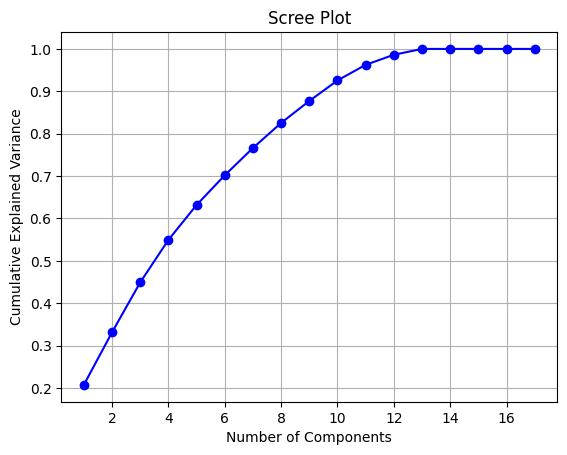

In [114]:
# Step 1: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_test_processed)

# Step 2: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [115]:
pca= PCA(n_components=10)

In [116]:
#Create a Transformer Pipeline
transformer = make_pipeline(StandardScaler(), pca)

#KNN Model

## KNN with PCA

In [117]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe_pca = make_pipeline(preprocessor, transformer, knn)
## Fit the model
knn_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                                   verbose_feature_names_out=False)),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=10))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### KNN with PCA Model Evaluation

In [118]:
%%time
# get predictions for train
preds_pca_train = knn_pipe_pca.predict(X_train)
# get prediction for test
preds_pca_test = knn_pipe_pca.predict(X_test)

print('PCA KNN Training accuracy:', knn_pipe_pca.score(X_train, y_train))
print('PCA KNN Testing accuracy:', knn_pipe_pca.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_pca_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_pca_test, target_names=labels))

PCA KNN Training accuracy: 0.9504287245444801
PCA KNN Testing accuracy: 0.946987951807229
Train
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      3547
      Stroke       0.50      0.04      0.08       185

    accuracy                           0.95      3732
   macro avg       0.73      0.52      0.53      3732
weighted avg       0.93      0.95      0.93      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245

CPU times: user 521 ms, sys: 172 ms, total: 693 ms
Wall time: 521 ms


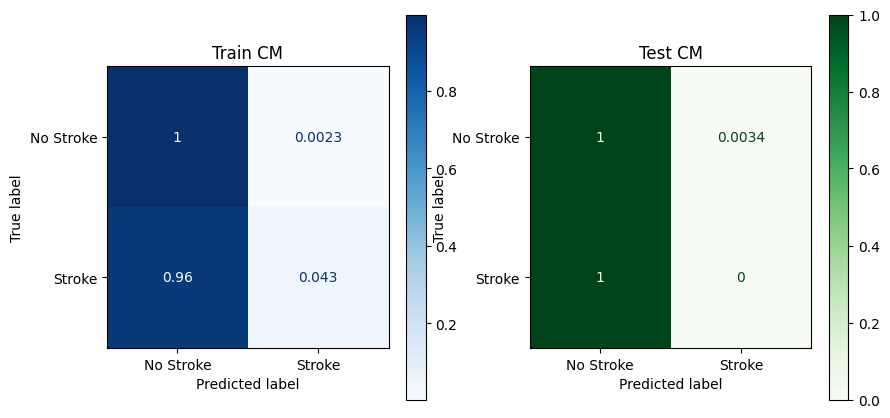

In [119]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_pca_train,
                                        ax=axes[0], cmap='Blues', normalize='true', display_labels=labels)
axes[0].set_title('Train CM')

ConfusionMatrixDisplay.from_predictions(y_test, preds_pca_test,
                                        ax=axes[1], cmap='Greens', normalize='true', display_labels=labels)
axes[1].set_title('Test CM');

##KNN Model without PCA

In [120]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

### KNN Model without PCA Evaluation

In [121]:
%%time
# Generate training predictions
knn_train_preds = knn_pipe.predict(X_train)
# Generate test predictions
knn_test_preds = knn_pipe.predict(X_test)

print('NO PCA KNN Training accuracy:', knn_pipe.score(X_train, y_train))
print('NO PCA KNN Testing accuracy:', knn_pipe.score(X_test, y_test))
print('Train\n', classification_report(y_train, knn_train_preds,target_names=labels))
print('Test\n', classification_report(y_test, knn_test_preds, target_names=labels))

NO PCA KNN Training accuracy: 0.9520364415862809
NO PCA KNN Testing accuracy: 0.9461847389558233
Train
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      3547
      Stroke       0.64      0.08      0.14       185

    accuracy                           0.95      3732
   macro avg       0.80      0.54      0.56      3732
weighted avg       0.94      0.95      0.93      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.47      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245

CPU times: user 835 ms, sys: 18.6 ms, total: 853 ms
Wall time: 591 ms


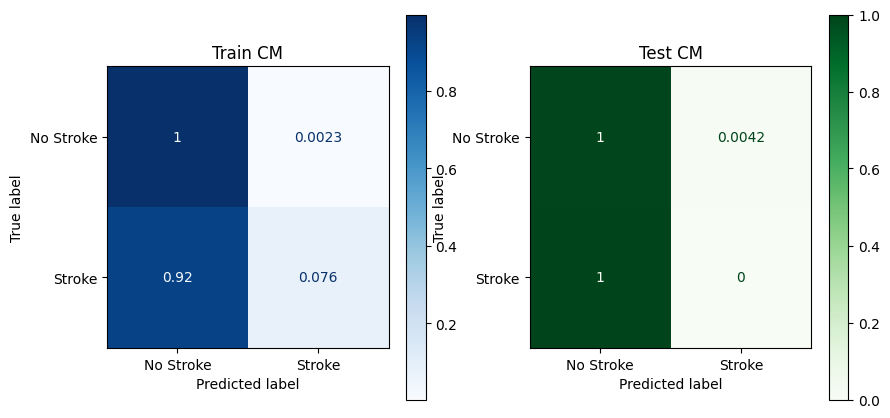

In [122]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
                                        ax=axes[0], cmap='Blues', normalize='true', display_labels=labels)
axes[0].set_title('Train CM')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
                                        ax=axes[1], cmap='Greens', normalize='true', display_labels=labels)
axes[1].set_title('Test CM');

## Tune using GridSearch

In [123]:
# Display the hyperparameters
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                     verbose_feature_names_out=False)),
  ('kneighborsclassifier', KNeighborsClassifier())]

In [124]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [125]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [126]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 6,
 'kneighborsclassifier__weights': 'uniform'}

In [127]:
knn_gs.best_score_

0.9506967997100106

In [128]:
best_knn = knn_gs.best_estimator_

In [129]:
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [130]:
print(f"GridSearch Tuned Train Accuracy Score is {best_knn.score(X_train, y_train)}\n")
print(f" GridSearch Tuned Test Accuracy Score is {best_knn.score(X_test, y_test)}\n")

print('Train\n', classification_report(y_train, train_preds, target_names=labels))
print('Test\n', classification_report(y_test, test_preds, target_names=labels))

GridSearch Tuned Train Accuracy Score is 0.9517684887459807

 GridSearch Tuned Test Accuracy Score is 0.9477911646586346

Train
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      3547
      Stroke       0.78      0.04      0.07       185

    accuracy                           0.95      3732
   macro avg       0.86      0.52      0.52      3732
weighted avg       0.94      0.95      0.93      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245



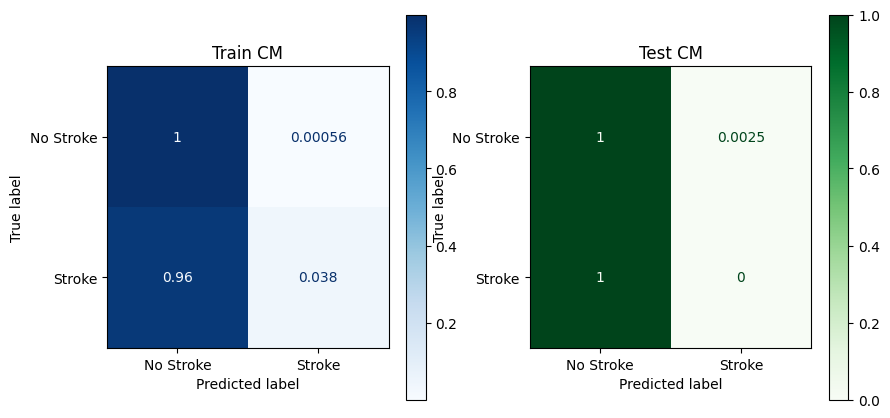

In [131]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

- False Positives decreased and False Negatives stayed the same when comparing the default model to the tuned model.  This Gridsearch model had lower False Positive than the KNN PCA model.  KNN GridSearch appears to be the Best KNN Model. 

#Random Forest Classifier

## Random Forest with PCA

In [132]:
# Create an instance of the model
random_forest = RandomForestClassifier(random_state=42)
# Create a model pipeline
rf_pipe_pca = make_pipeline(preprocessor, transformer, random_forest )
## Fit the model
rf_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                                   verbose_feature_names_out=False)),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=10))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

### Random Forest with PCA Model Evaluation

In [133]:
%%time
# get predictions for train
preds_pca_train = rf_pipe_pca.predict(X_train)
# get prediction for test
preds_pca_test = rf_pipe_pca.predict(X_test)

print('PCA Random Forest Training accuracy:', rf_pipe_pca.score(X_train, y_train))
print('PCA Random Forest Testing accuracy:', rf_pipe_pca.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_pca_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_pca_test, target_names=labels))

PCA Random Forest Training accuracy: 1.0
PCA Random Forest Testing accuracy: 0.9477911646586346
Train
               precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3547
      Stroke       1.00      1.00      1.00       185

    accuracy                           1.00      3732
   macro avg       1.00      1.00      1.00      3732
weighted avg       1.00      1.00      1.00      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245

CPU times: user 314 ms, sys: 199 ms, total: 512 ms
Wall time: 309 ms


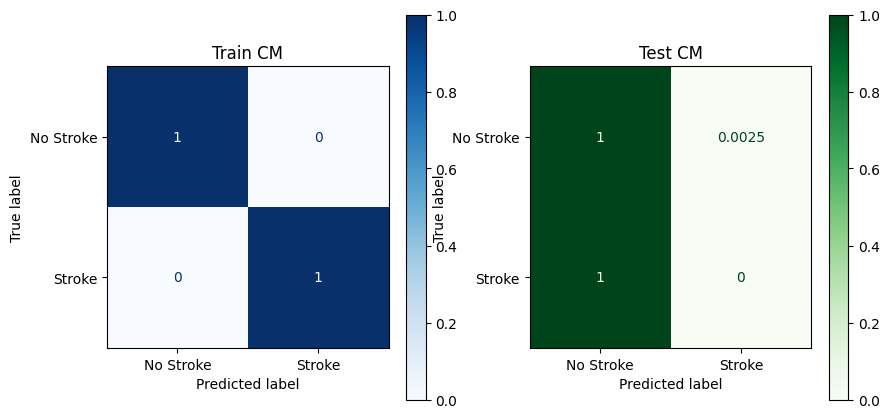

In [134]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_pca_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, preds_pca_test,
                                        ax=axes[1], cmap='Greens',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Random Forest without PCA

In [135]:
# Create an instance of the model
random_forest = RandomForestClassifier(random_state=42)

# Create the pipeline
rf_pipe = make_pipeline(preprocessor, random_forest)

# Fit on training data
rf_pipe.fit(X_train, y_train)

# Make predictions
rf_test_preds = rf_pipe.predict(X_test)
rf_train_preds= rf_pipe.predict(X_train)

### Random Forest Without PCA Model Evaluation

In [136]:
print(f"Default Train Accuracy Score is {rf_pipe.score(X_train, y_train)}\n")
print(f"Default Test Accuracy Score is {rf_pipe.score(X_test, y_test)}\n")

print('Train Report')
print(classification_report(y_train, rf_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, rf_test_preds, target_names=labels))

Default Train Accuracy Score is 1.0

Default Test Accuracy Score is 0.946987951807229

Train Report
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3547
      Stroke       1.00      1.00      1.00       185

    accuracy                           1.00      3732
   macro avg       1.00      1.00      1.00      3732
weighted avg       1.00      1.00      1.00      3732

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245



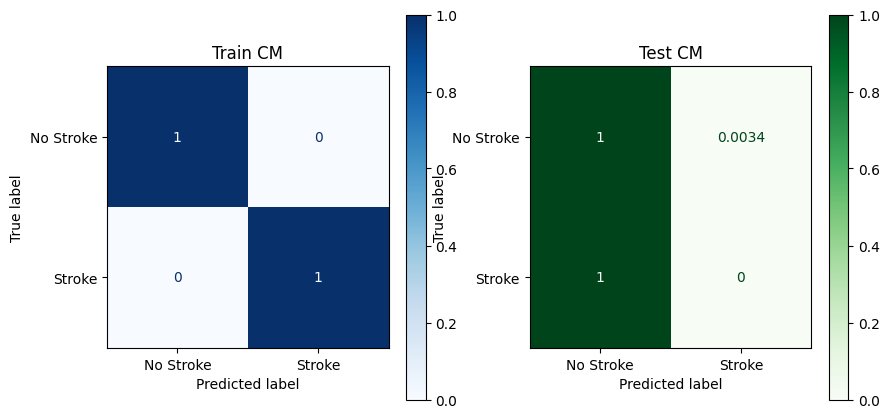

In [137]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, rf_pipe.predict(X_test),
                                        ax=axes[1], cmap='Greens',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Tune using GridSearch

In [138]:
#Get parameters
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                     verbose_feature_names_out=False)),
  ('randomforestclassifier', RandomForestClassifier

In [139]:
# Define the parameter grid
param_grid = {
    'randomforestclassifier__max_depth': range(1, 15),
    'randomforestclassifier__criterion': ['gini', 'entropy']}

In [140]:
rf_gs= GridSearchCV(rf_pipe, param_grid)
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': range(1, 15)})

In [141]:
#Display the parameters of the model
rf_gs.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 1}

In [142]:
rf_gs.best_score_

0.9504287031952654

In [143]:
best_rf= rf_gs.best_estimator_

In [144]:
train_preds= best_rf.predict(X_train)
test_preds= best_rf.predict(X_test)

In [145]:
print(f"Tuned Train Accuracy Score is {best_rf.score(X_train, y_train)}\n")
print(f"Tuned Test Accuracy Score is {best_rf.score(X_test, y_test)}\n")

print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Tuned Train Accuracy Score is 0.9504287245444801

Tuned Test Accuracy Score is 0.9502008032128514

Train
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3547
           1       0.00      0.00      0.00       185

    accuracy                           0.95      3732
   macro avg       0.48      0.50      0.49      3732
weighted avg       0.90      0.95      0.93      3732

Test
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1183
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.93      1245



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

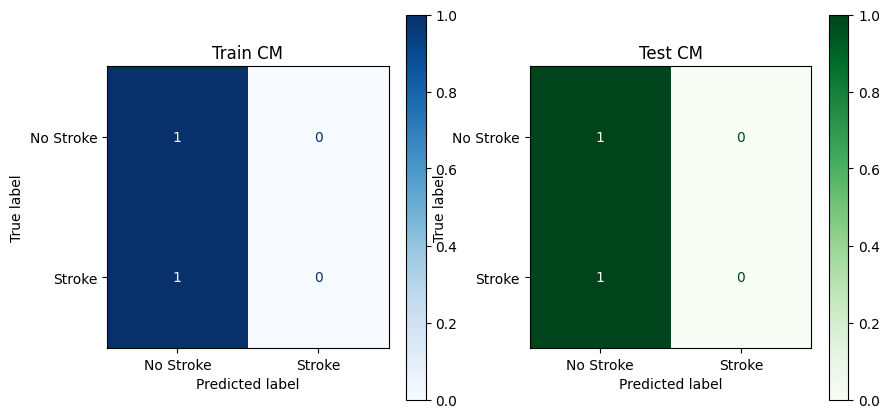

In [146]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

- Random Forest GridSearch did the best of all the Random Forest models.  It   It also had lowest False Positives.  I wasn't able to reduce the false negatives at all. 

# Logistic Regression Model

## Logistic Regression with PCA

In [147]:
# Create an instance of the model
logreg_pca= LogisticRegression(random_state=42)
# Create a model pipeline
logreg_pipe_pca = make_pipeline(preprocessor, transformer, logreg_pca )
## Fit the model
logreg_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                                   verbose_feature_names_out=False)),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=10))])),
                ('logisticregression', LogisticRegression(random_state=42))])

### Logistic Regression with PCA Model Evaluation

In [148]:
%%time
# get predictions for train
logreg_preds_pca_train = logreg_pipe_pca.predict(X_train)
# get prediction for test
logreg_preds_pca_test = logreg_pipe_pca.predict(X_test)

print('PCA Logistic Regression Training accuracy:', logreg_pipe_pca.score(X_train, y_train))
print('PCA Logistic Regression Testing accuracy:', logreg_pipe_pca.score(X_test, y_test))
print('Train\n', classification_report(y_train, logreg_preds_pca_train,target_names=labels))
print('Test\n', classification_report(y_test, logreg_preds_pca_test, target_names=labels))

PCA Logistic Regression Training accuracy: 0.9504287245444801
PCA Logistic Regression Testing accuracy: 0.9502008032128514
Train
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      3547
      Stroke       0.00      0.00      0.00       185

    accuracy                           0.95      3732
   macro avg       0.48      0.50      0.49      3732
weighted avg       0.90      0.95      0.93      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.93      1245

CPU times: user 116 ms, sys: 67.6 ms, total: 184 ms
Wall time: 217 ms


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

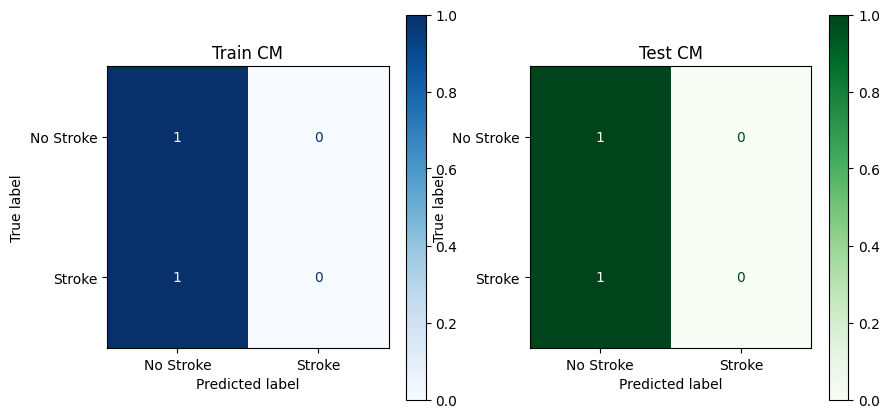

In [149]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, logreg_preds_pca_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, logreg_preds_pca_test,
                                        ax=axes[1], cmap='Greens',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Logistic Regression without PCA

In [150]:
#create an instance of the model
logreg= LogisticRegression(random_state=42)
#create the pipeline
log_reg_pipe = make_pipeline(preprocessor, logreg)
#Fit on training data
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

### Logistic Regression without PCA Model Evaluation

In [151]:
#make predictions
logreg_test_preds = log_reg_pipe.predict(X_test)
logreg_train_preds = log_reg_pipe.predict(X_train)

print(f"Default Train Accuracy Score is {log_reg_pipe.score(X_train, y_train)}")
print(f"Default Test Accuracy Score is {log_reg_pipe.score(X_test, y_test)}")

Default Train Accuracy Score is 0.9506966773847803
Default Test Accuracy Score is 0.9502008032128514


In [152]:
## print the classification reports

print('Train Report')
print(classification_report(y_train, logreg_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, logreg_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      3547
      Stroke       1.00      0.01      0.01       185

    accuracy                           0.95      3732
   macro avg       0.98      0.50      0.49      3732
weighted avg       0.95      0.95      0.93      3732

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.93      1245



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


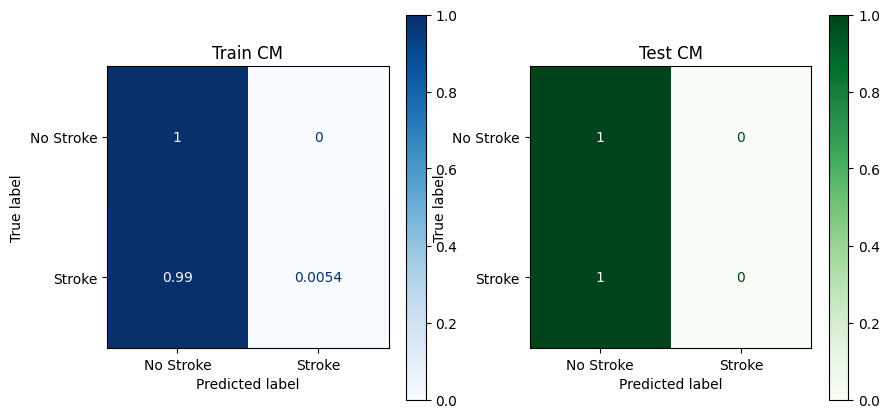

In [153]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, logreg_train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, logreg_test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

- PCA and no PCA appear to have the same resultss

##Tune using GridSearch

In [154]:
#Display the parameters of the model
model = LogisticRegression() 
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [155]:
# Create the logistic regression model
logreg_gs = LogisticRegression(random_state=42, solver='liblinear')

# Define the parameter grid
param_grid = {
    'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
    'logisticregression__penalty': ['l1', 'l2'], 
    'logisticregression__class_weight': ['balanced']}

# Create the pipeline
pipeline = make_pipeline(preprocessor,logreg_gs)

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid)

# Fit the data to perform the hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
train_preds= best_model.predict(X_train)
test_preds= best_model.predict(X_test)

Best Hyperparameters:  {'logisticregression__C': 0.0001, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1'}


In [156]:
print(f"Tuned Train Accuracy Score is {best_model.score(X_train, y_train)}\n")
print(f"Tuned Test Accuracy Score is {best_model.score(X_test, y_test)}\n")

print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Tuned Train Accuracy Score is 0.9504287245444801

Tuned Test Accuracy Score is 0.9502008032128514

Train
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3547
           1       0.00      0.00      0.00       185

    accuracy                           0.95      3732
   macro avg       0.48      0.50      0.49      3732
weighted avg       0.90      0.95      0.93      3732

Test
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1183
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.93      1245



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

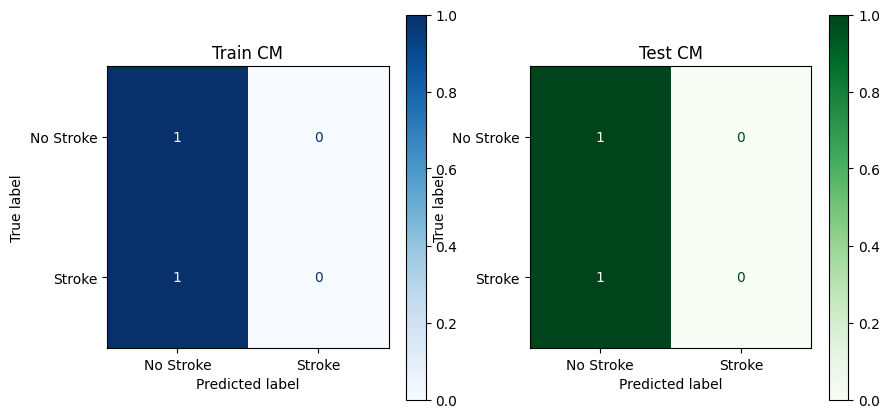

In [157]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

- All three Logistic Regression Models appeared to have the exact same results. 

# Feature Engineering

- I will create an age bin with three categories.  
    - young age
    - middle age
    - old age

In [158]:
df.columns

Index(['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

In [159]:
age_bins = [0, 25, 44, float('inf')]
age_labels = ['young_age', 'middle_age', 'old_age']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [160]:
print(df['age_group'].value_counts())

old_age       2592
young_age     1205
middle_age    1180
Name: age_group, dtype: int64


- I will create bmi bin as well with 4 categories.
    - Underweight
    - Normal
    - Overweight
    - Obese

In [161]:
bmi_bins = [0, 18.5, 25, 30, float('inf')]
bmi_labels = ['underweight', 'normal', 'overweight', 'obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

In [162]:
print(df['bmi_category'].value_counts())

obese          1805
overweight     1404
normal         1232
underweight     335
Name: bmi_category, dtype: int64


- Lets Remove 'age' and 'bmi' columns now

In [163]:
df.drop(['age', 'bmi'], axis=1, inplace=True)

In [164]:
#Encode these as numerical values
df = pd.get_dummies(df, columns=['bmi_category', 'age_group'])


In [168]:
df['bmi_category_normal'].value_counts()

0    3745
1    1232
Name: bmi_category_normal, dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4977 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    4977 non-null   object 
 1   hypertension              4977 non-null   int64  
 2   ever_married              4977 non-null   int64  
 3   work_type                 4977 non-null   object 
 4   Residence_type            4977 non-null   object 
 5   avg_glucose_level         4977 non-null   float64
 6   smoking_status            4977 non-null   object 
 7   stroke                    4977 non-null   int64  
 8   bmi_category_underweight  4977 non-null   uint8  
 9   bmi_category_normal       4977 non-null   uint8  
 10  bmi_category_overweight   4977 non-null   uint8  
 11  bmi_category_obese        4977 non-null   uint8  
 12  age_group_young_age       4977 non-null   uint8  
 13  age_group_middle_age      4977 non-null   uint8  
 14  age_grou

## Feature Engineering with KNN

In [171]:
X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)

In [172]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [174]:
# Generate training predictions
knn_train_preds = knn_pipe.predict(X_train)
# Generate test predictions
knn_test_preds = knn_pipe.predict(X_test)

print('Feature Engineered KNN Training accuracy:', knn_pipe.score(X_train, y_train))
print('Feature Engineered KNN Testing accuracy:', knn_pipe.score(X_test, y_test))
print('Train\n', classification_report(y_train, knn_train_preds,target_names=labels))
print('Test\n', classification_report(y_test, knn_test_preds, target_names=labels))

Feature Engineered KNN Training accuracy: 0.9536441586280815
Feature Engineered KNN Testing accuracy: 0.9397590361445783
Train
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      3559
      Stroke       0.50      0.02      0.03       173

    accuracy                           0.95      3732
   macro avg       0.73      0.51      0.50      3732
weighted avg       0.93      0.95      0.93      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.94      1.00      0.97      1171
      Stroke       0.43      0.04      0.07        74

    accuracy                           0.94      1245
   macro avg       0.69      0.52      0.52      1245
weighted avg       0.91      0.94      0.92      1245



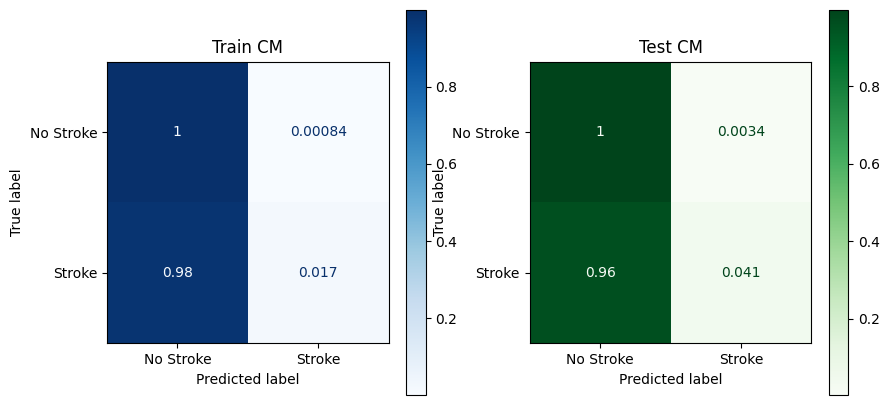

In [182]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
                                        ax=axes[0], cmap='Blues', normalize='true', display_labels=labels)
axes[0].set_title('Train CM')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
                                        ax=axes[1], cmap='Greens', normalize='true', display_labels=labels)
axes[1].set_title('Test CM');

## Feature Engineering with Logistic Regression

In [176]:
#create an instance of the model
logreg= LogisticRegression(random_state=42)
#create the pipeline
log_reg_pipe = make_pipeline(preprocessor, logreg)
#Fit on training data
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199be3ee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd199b97a60>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [187]:
#make predictions
logreg_test_preds = log_reg_pipe.predict(X_test)
logreg_train_preds = log_reg_pipe.predict(X_train)

print(f"Feature Engineered Log Reg Train Accuracy Score is {log_reg_pipe.score(X_train, y_train)}")
print(f"Feature Engineered Log Reg Test Accuracy Score is {log_reg_pipe.score(X_test, y_test)}")

Feature Engineered Log Reg Train Accuracy Score is 0.9531082529474812
Feature Engineered Log Reg Test Accuracy Score is 0.940562248995984


In [188]:
## print the classification reports

print('Feature Engineered Log Reg Train Report')
print(classification_report(y_train, logreg_train_preds, target_names=labels))

print('Feature Engineered Log Reg Test Report')
print(classification_report(y_test, logreg_test_preds, target_names=labels))

Feature Engineered Log Reg Train Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      3559
      Stroke       0.00      0.00      0.00       173

    accuracy                           0.95      3732
   macro avg       0.48      0.50      0.49      3732
weighted avg       0.91      0.95      0.93      3732

Feature Engineered Log Reg Test Report
              precision    recall  f1-score   support

   No Stroke       0.94      1.00      0.97      1171
      Stroke       0.00      0.00      0.00        74

    accuracy                           0.94      1245
   macro avg       0.47      0.50      0.48      1245
weighted avg       0.88      0.94      0.91      1245



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


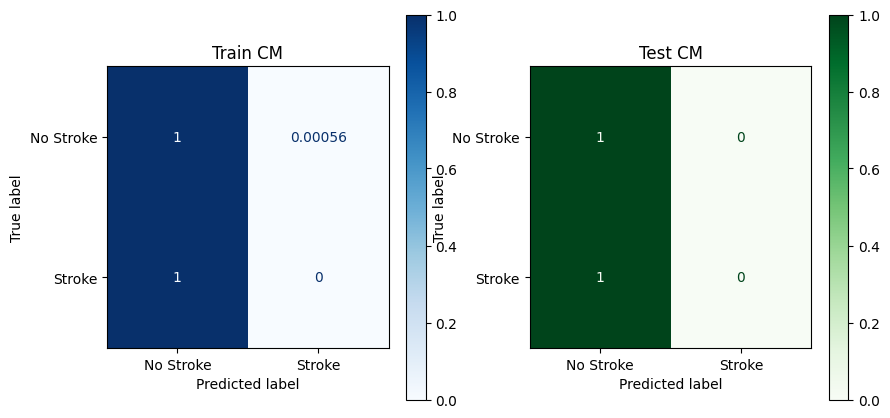

In [183]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, logreg_train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, logreg_test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Feature Engineering with Random Forest

In [180]:
# Create an instance of the model
random_forest = RandomForestClassifier(random_state=42)

# Create the pipeline
rf_pipe = make_pipeline(preprocessor, random_forest)

# Fit on training data
rf_pipe.fit(X_train, y_train)

# Make predictions
rf_test_preds = rf_pipe.predict(X_test)
rf_train_preds= rf_pipe.predict(X_train)

In [190]:
print(f"Feature Engineered Random Forest Train Accuracy Score is {rf_pipe.score(X_train, y_train)}\n")
print(f"Feature Engineered Random Forest Test Accuracy Score is {rf_pipe.score(X_test, y_test)}\n")

print('Train Report')
print(classification_report(y_train, rf_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, rf_test_preds, target_names=labels))

Feature Engineered Random Forest Train Accuracy Score is 1.0

Feature Engineered Random Forest Test Accuracy Score is 0.9301204819277108

Train Report
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3559
      Stroke       1.00      1.00      1.00       173

    accuracy                           1.00      3732
   macro avg       1.00      1.00      1.00      3732
weighted avg       1.00      1.00      1.00      3732

Test Report
              precision    recall  f1-score   support

   No Stroke       0.94      0.99      0.96      1171
      Stroke       0.16      0.04      0.06        74

    accuracy                           0.93      1245
   macro avg       0.55      0.51      0.51      1245
weighted avg       0.90      0.93      0.91      1245



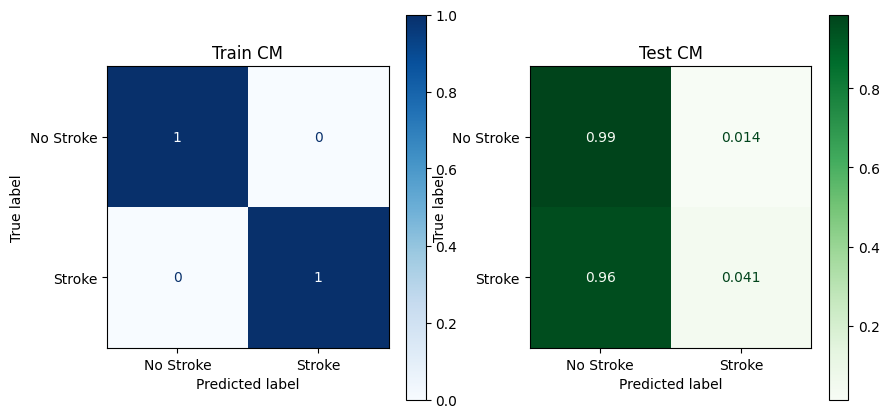

In [184]:
 #Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, rf_pipe.predict(X_test),
                                        ax=axes[1], cmap='Greens',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

# Recommendations and Final Evaluation of all Models

For this business problem, we want to look at F1 score and recall mostly.  This is an extremely unbalanced class so accuracy will not be a good metric.  Recall in terms of stroke diagnosis would be the percentage of patients who actually have a stroke and are correctly identified by the model. Recall is important metric because missing a stroke case can have serious consequence for the patient's health and recovery.  

 - Overall KNN with Feature Engineering gave the best results with the highest F1 score of our positive class (Stroke).  It also had the highest Recall for the positive class and the lowest False Positives.  It did reduce the False Negatives as well.  